In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import json
import time
from datetime import datetime
from config import weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

# we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lats_lngs = zip(lats,lngs)
lats_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)


In [8]:
# Use the print() function to display the latitude and longitude combinations.
# Using CitiPy module, get the nearest city name and country code for the list of lats_lngs.
# First, create a list to hold the cities.
cities = []

for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
print(len(cities))

599


In [9]:
# URL to make the API call and get the weather data.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_Count = 1

# Loop through all the cities in our list.
for i , city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_Count += 1
        record_count = 1
        time.sleep(60)

     # Create endpoint URL with each city.
    city_url = url +"&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_Count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Exception Handling
    try:
        response = requests.get(city_url)
        city_weather = response.json()
       
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
  
        # Append the city information into city_data list.
        city_data.append({"City":city.title(),
                             "Latitude":city_lat,
                             "Longitude":city_lng,
                             "Max Temp":city_max_temp,
                             "Humidity":city_humidity,
                             "Clouds":city_clouds,
                             "Wind":city_wind,
                             "Country":city_country,
                             "Date":city_date})
    except:
        print("City not found. Skipping...")
        pass
        
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
       

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | kenai
Processing Record 4 of Set 1 | fort nelson
Processing Record 5 of Set 1 | chapais
Processing Record 6 of Set 1 | nampula
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | iwanai
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | artyom
Processing Record 15 of Set 1 | san jose
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | nikel
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | laguna
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Set 1 | victoria


Processing Record 38 of Set 4 | margate
Processing Record 39 of Set 4 | dukat
Processing Record 40 of Set 4 | paraopeba
Processing Record 41 of Set 4 | kobojango
City not found. Skipping...
Processing Record 42 of Set 4 | tacuati
Processing Record 43 of Set 4 | vardo
Processing Record 44 of Set 4 | denpasar
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | buqayq
City not found. Skipping...
Processing Record 47 of Set 4 | adrar
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | alta floresta
Processing Record 50 of Set 4 | krasnofarfornyy
Processing Record 1 of Set 5 | atsiki
City not found. Skipping...
Processing Record 2 of Set 5 | donegal
Processing Record 3 of Set 5 | sinnamary
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | yarada
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | jumla
Processing Record 9 of Set 5 | norman wells
Processing Recor

Processing Record 26 of Set 8 | heihe
Processing Record 27 of Set 8 | port macquarie
Processing Record 28 of Set 8 | sembakung
Processing Record 29 of Set 8 | ahipara
Processing Record 30 of Set 8 | half moon bay
Processing Record 31 of Set 8 | manaure
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | puerto montt
Processing Record 34 of Set 8 | abha
Processing Record 35 of Set 8 | nguiu
City not found. Skipping...
Processing Record 36 of Set 8 | noumea
Processing Record 37 of Set 8 | kanlagay
Processing Record 38 of Set 8 | tiksi
Processing Record 39 of Set 8 | esperance
Processing Record 40 of Set 8 | vostok
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | grafton
Processing Record 43 of Set 8 | kaeo
Processing Record 44 of Set 8 | provideniya
Processing Record 45 of Set 8 | ayolas
Processing Record 46 of Set 8 | vanimo
Processing Record 47 of Set 8 | moron
Processing Record 48 of Set 8 | trairi
Processing Record 49 of Set 8 | karimga

Processing Record 15 of Set 12 | penzance
Processing Record 16 of Set 12 | sovetskiy
Processing Record 17 of Set 12 | yar-sale
Processing Record 18 of Set 12 | dwarka
Processing Record 19 of Set 12 | nossa senhora do socorro
Processing Record 20 of Set 12 | dibulla
Processing Record 21 of Set 12 | yanan
City not found. Skipping...
Processing Record 22 of Set 12 | veraval
Processing Record 23 of Set 12 | kande
Processing Record 24 of Set 12 | caernarfon
Processing Record 25 of Set 12 | naftah
City not found. Skipping...
Processing Record 26 of Set 12 | hamilton
Processing Record 27 of Set 12 | point pedro
Processing Record 28 of Set 12 | port hawkesbury
Processing Record 29 of Set 12 | saint-augustin
Processing Record 30 of Set 12 | rocha
Processing Record 31 of Set 12 | rodrigues alves
Processing Record 32 of Set 12 | xai-xai
Processing Record 33 of Set 12 | uga
Processing Record 34 of Set 12 | ust-barguzin
Processing Record 35 of Set 12 | mayumba
Processing Record 36 of Set 12 | brits

In [11]:
len(city_data)

545

In [12]:
# Convert the array of dictionaries into a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Clouds,Wind,Country,Date
0,Mataura,-46.1927,168.8643,46.47,80,83,4.83,NZ,2022-09-14 05:45:10
1,Dikson,73.5069,80.5464,39.16,76,100,21.12,RU,2022-09-14 05:45:10
2,Kenai,60.5544,-151.2583,49.14,98,75,6.91,US,2022-09-14 05:45:10
3,Fort Nelson,58.8053,-122.7002,45.99,76,20,2.30,CA,2022-09-14 05:45:11
4,Chapais,49.7834,-74.8492,58.78,93,99,9.95,CA,2022-09-14 05:41:20
5,Nampula,-15.1165,39.2666,69.75,83,40,11.99,MZ,2022-09-14 05:45:11
6,Busselton,-33.6500,115.3333,59.41,67,92,20.87,AU,2022-09-14 05:45:00
7,Rikitea,-23.1203,-134.9692,72.01,73,100,9.13,PF,2022-09-14 05:45:11
8,Albany,42.6001,-73.9662,59.34,94,15,5.99,US,2022-09-14 05:42:24
9,Hasaki,35.7333,140.8333,86.29,75,82,17.20,JP,2022-09-14 05:45:12


In [13]:
# we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_columns_list = ["City","Country","Date","Latitude","Longitude","Max Temp","Humidity","Clouds","Wind"]

city_data_df = city_data_df[new_columns_list]
city_data_df.columns

Index(['City', 'Country', 'Date', 'Latitude', 'Longitude', 'Max Temp',
       'Humidity', 'Clouds', 'Wind'],
      dtype='object')

In [14]:
# Display the DataFrame
city_data_df.head(10)

,City,Country,Date,Latitude,Longitude,Max Temp,Humidity,Clouds,Wind
0,Mataura,NZ,2022-09-14 05:45:10,-46.1927,168.8643,46.47,80,83,4.83
1,Dikson,RU,2022-09-14 05:45:10,73.5069,80.5464,39.16,76,100,21.12
2,Kenai,US,2022-09-14 05:45:10,60.5544,-151.2583,49.14,98,75,6.91
3,Fort Nelson,CA,2022-09-14 05:45:11,58.8053,-122.7002,45.99,76,20,2.30
4,Chapais,CA,2022-09-14 05:41:20,49.7834,-74.8492,58.78,93,99,9.95
5,Nampula,MZ,2022-09-14 05:45:11,-15.1165,39.2666,69.75,83,40,11.99
6,Busselton,AU,2022-09-14 05:45:00,-33.6500,115.3333,59.41,67,92,20.87
7,Rikitea,PF,2022-09-14 05:45:11,-23.1203,-134.9692,72.01,73,100,9.13
8,Albany,US,2022-09-14 05:42:24,42.6001,-73.9662,59.34,94,15,5.99
9,Hasaki,JP,2022-09-14 05:45:12,35.7333,140.8333,86.29,75,82,17.20


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

## We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed. 

In [16]:
# Extract relevant fields from the DataFrame for plotting.
city_data_df.columns

Index(['City', 'Country', 'Date', 'Latitude', 'Longitude', 'Max Temp',
       'Humidity', 'Clouds', 'Wind'],
      dtype='object')

In [17]:
lats = city_data_df["Latitude"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Clouds"]
wind_speed = city_data_df["Wind"]

## create a scatter plot for the latitude vs. maximum temperature.

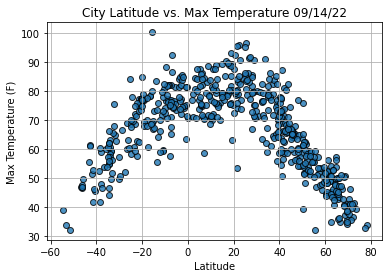

In [23]:
# Today
today = time.strftime("%x")

fig, ax = plt.subplots()

ax.scatter(lats,max_temps, label="Cities", edgecolors="k",alpha=0.8)
ax.set_title("City Latitude vs. Max Temperature " + today)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()


## create a scatter plot that compares the latitude vs. the humidity.

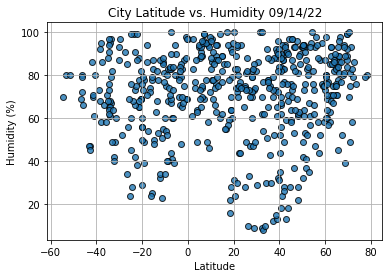

In [24]:
# Today
today = time.strftime("%x")

fig, ax = plt.subplots()

ax.scatter(lats,humidity, label="Cities", edgecolors="k",alpha=0.8)
ax.set_title("City Latitude vs. Humidity " + today)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

plt.show()

## create a scatter plot that compares the latitude vs. the cloudiness.

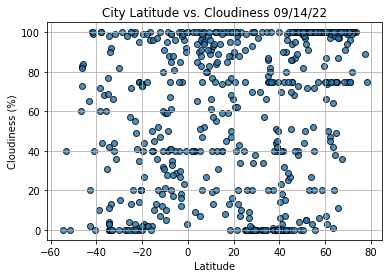

In [25]:
# Today
today = time.strftime("%x")

fig, ax = plt.subplots()

ax.scatter(lats,cloudiness, label="Cities", edgecolors="k",alpha=0.8)
ax.set_title("City Latitude vs. Cloudiness " + today)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

plt.show()

## create a scatter plot that compares the latitude vs. Wind Speed.

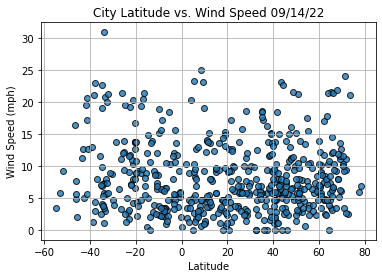

In [26]:
# Today
today = time.strftime("%x")

fig, ax = plt.subplots()

ax.scatter(lats,wind_speed, label="Cities", edgecolors="k",alpha=0.8)
ax.set_title("City Latitude vs. Wind Speed " + today)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

plt.show()